<a href="https://colab.research.google.com/github/kamui-moritaalbright/ImageProcessor/blob/main/Auto_FaceBlurr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

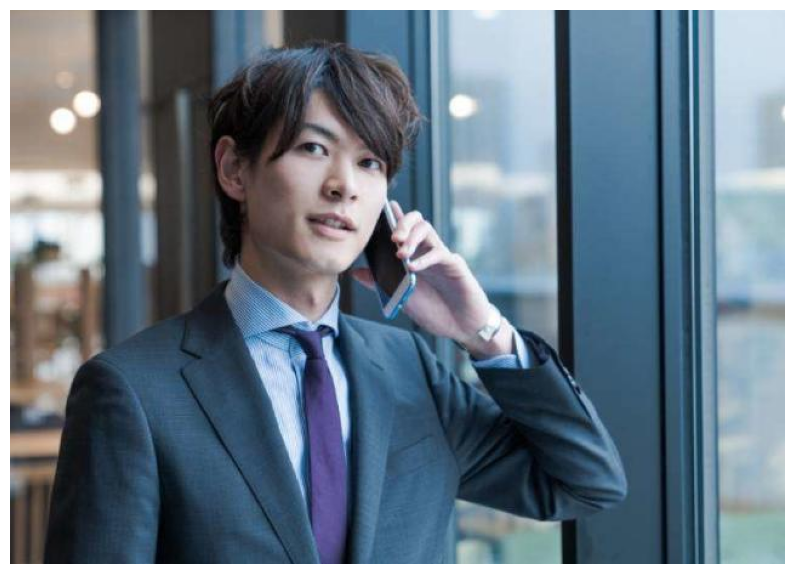

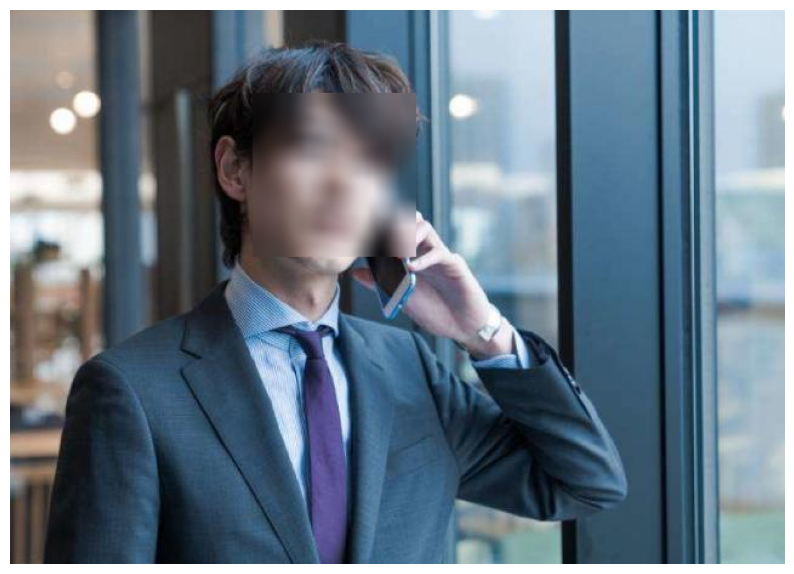

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# A function for plotting the images
def plotImages(img):
    plt.figure(figsize=(10, 8))
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()

# Path to the image file
image_path = '/content/nihonjin.jpeg'

# Check if the file exists
if not os.path.isfile(image_path):
    print(f"Error: The file {image_path} does not exist.")
else:
    # Reading an image using OpenCV
    # OpenCV reads images by default in BGR format
    image = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Error: Unable to read the image at {image_path}")
    else:
        # Converting BGR image into a RGB image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # plotting the original image
        plotImages(image)

        # Path to the Haar Cascade XML file
        cascade_path = '/content/haarcascade_frontalface_alt.xml'

        # Check if the Haar Cascade file exists
        if not os.path.isfile(cascade_path):
            print(f"Error: The Haar Cascade file {cascade_path} does not exist.")
        else:
            face_detect = cv2.CascadeClassifier(cascade_path)
            face_data = face_detect.detectMultiScale(image, 1.05, 3)

            # Apply blurring to the detected face regions
            for (x, y, w, h) in face_data:
                roi = image[y:y+h, x:x+w]
                # applying a gaussian blur over this new rectangle area
                blurred_roi = cv2.GaussianBlur(roi, (23, 23), 30)
                # impose this blurred image on original image to get final image
                image[y:y+h, x:x+w] = blurred_roi

            # Plot the final image
            plotImages(image)

In [24]:
import os
from google.colab import drive
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Change to the directory where the Colab notebook is located
colab_dir = '/content/drive/MyDrive/Work/Testing/new_images'  # Adjust this path if necessary
os.chdir(colab_dir)

# Create a new folder for processed images
new_folder = 'new_images'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# List all files in the current directory
files = os.listdir()

# List of common image file extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']

def process_image(filename):
    # Read the image using OpenCV
    image = cv2.imread(filename)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Error: Unable to read the image at {filename}")
        return

    # Converting BGR image into an RGB image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Path to the Haar Cascade XML file
    cascade_path = '/content/drive/MyDrive/Work/Testing/haarcascade_frontalface_alt.xml'

    # Check if the Haar Cascade file exists
    if not os.path.isfile(cascade_path):
        print(f"Error: The Haar Cascade file {cascade_path} does not exist.")
        return

    face_detect = cv2.CascadeClassifier(cascade_path)
    face_data = face_detect.detectMultiScale(image_rgb, 1.05, 3)

    # Apply blurring to the detected face regions
    for (x, y, w, h) in face_data:
        roi = image_rgb[y:y+h, x:x+w]
        # applying a gaussian blur over this new rectangle area
        blurred_roi = cv2.GaussianBlur(roi, (23, 23), 30)
        # impose this blurred image on original image to get final image
        image_rgb[y:y+h, x:x+w] = blurred_roi

    # Convert back to BGR for saving
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    # Save the processed image
    output_path = os.path.join(new_folder, os.path.basename(filename))
    cv2.imwrite(output_path, image_bgr)

# Process each image file
for file in files:
    if any(file.lower().endswith(ext) for ext in image_extensions):
        try:
            process_image(os.path.join(colab_dir, file))
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

print("Image processing completed.")
print(f"Processed images are saved in: {new_folder}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image processing completed.
Processed images are saved in: new_images


In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plotImages(img):
    plt.figure(figsize=(10, 8))
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()

def process_image(filename, new_folder, cascade_path):
    # Read the image using OpenCV
    image = cv2.imread(filename)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Error: Unable to read the image at {filename}")
        return

    # Converting BGR image into an RGB image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the original image (optional, comment out if not needed)
    # plotImages(image_rgb)

    # Check if the Haar Cascade file exists
    if not os.path.isfile(cascade_path):
        print(f"Error: The Haar Cascade file {cascade_path} does not exist.")
        return

    face_detect = cv2.CascadeClassifier(cascade_path)

    # Adjusted parameters for better face detection
    face_data = face_detect.detectMultiScale(image_rgb, scaleFactor=1.05, minNeighbors=3)

    # Apply blurring to the detected face regions
    for (x, y, w, h) in face_data:
        roi = image_rgb[y:y+h, x:x+w]
        # applying a gaussian blur over this new rectangle area
        blurred_roi = cv2.GaussianBlur(roi, (23, 23), 30)
        # impose this blurred image on original image to get final image
        image_rgb[y:y+h, x:x+w] = blurred_roi

    # Plot the final image (optional, comment out if not needed)
    # plotImages(image_rgb)

    # Convert back to BGR for saving
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    # Save the processed image
    output_path = os.path.join(new_folder, os.path.basename(filename))
    cv2.imwrite(output_path, image_bgr)

    print(f"Processed and saved: {output_path}")

# Main execution
if __name__ == "__main__":
    # Mount Google Drive (if using Google Colab)
    # from google.colab import drive
    drive.mount('/content/drive')

    # Set the working directory
    colab_dir = '/content/drive/MyDrive/Work/Testing/new_images'  # Adjust this path if necessary
    os.chdir(colab_dir)

    # Create a new folder for processed images
    new_folder = 'processed_images'
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    # Path to the Haar Cascade XML file
    cascade_path = '/content/drive/MyDrive/Work/Testing/haarcascade_frontalface_alt.xml'  # Ensure this file is in the correct location

    # List all files in the current directory
    files = os.listdir()

    # List of common image file extensions
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']

    # Process each image file
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            try:
                process_image(os.path.join(colab_dir, file), new_folder, cascade_path)
            except Exception as e:
                print(f"Error processing {file}: {str(e)}")

    print("Image processing completed.")
    print(f"Processed images are saved in: {new_folder}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed and saved: processed_images/pexels-nastiz-12024377.jpg
Processed and saved: processed_images/pexels-gabriella-ally-3664539-16176400.jpg
Processed and saved: processed_images/title-1-5.jpg
Processed and saved: processed_images/pexels-ali-ramazan-ciftci-82252581-13522012.jpg
Processed and saved: processed_images/Japanese_People.jpg
Processed and saved: processed_images/nihonjin.jpeg
Image processing completed.
Processed images are saved in: processed_images
